Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


%matplotlib inline

Load Data:

In [2]:
df = pd.read_csv('a1_dataset.csv')
df = df.drop('var7', axis=1) #TODO

In [3]:
df.shape

(925, 7)

In [4]:
df

,target,var1,var2,var3,var4,var5,var6
0,0,509.18,417.681,Micronesia,138.0,393.00,no
1,0,446.06,666.182,Dominica,81.0,352.05,yes
2,1,235.50,398.097,Isle of Man,90.0,339.00,no
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes
4,0,453.08,600.156,Cameroon,105.0,422.95,no
...,...,...,...,...,...,...,...
920,0,422.34,547.259,Belarus,NaN,350.45,yes
921,1,342.62,473.919,Japan,NaN,200.85,no
922,1,265.10,538.170,Saint Martin,NaN,208.35,yes
923,0,397.12,622.386,Chad,NaN,433.45,yes


In [5]:
df.describe()

,target,var1,var2,var4,var5
count,925.000000,925.000000,925.000000,325.000000,925.000000
mean,0.496216,360.116562,548.390134,108.452308,325.393946
std,0.500256,87.866662,135.221460,26.325744,78.862779
min,0.000000,209.560000,139.965000,57.000000,163.000000
25%,0.000000,278.640000,467.373000,87.000000,257.900000
50%,0.000000,367.640000,569.841000,105.000000,342.350000
75%,1.000000,437.600000,652.278000,126.000000,393.000000
max,1.000000,539.920000,794.848000,180.000000,457.150000


Visualize data:

In [6]:
feat1 = df.var1
feat2 = df.var2
feat4 = df.var4
feat5 = df.var5
target = df.target

feats = [feat1, feat2, feat4, feat5]


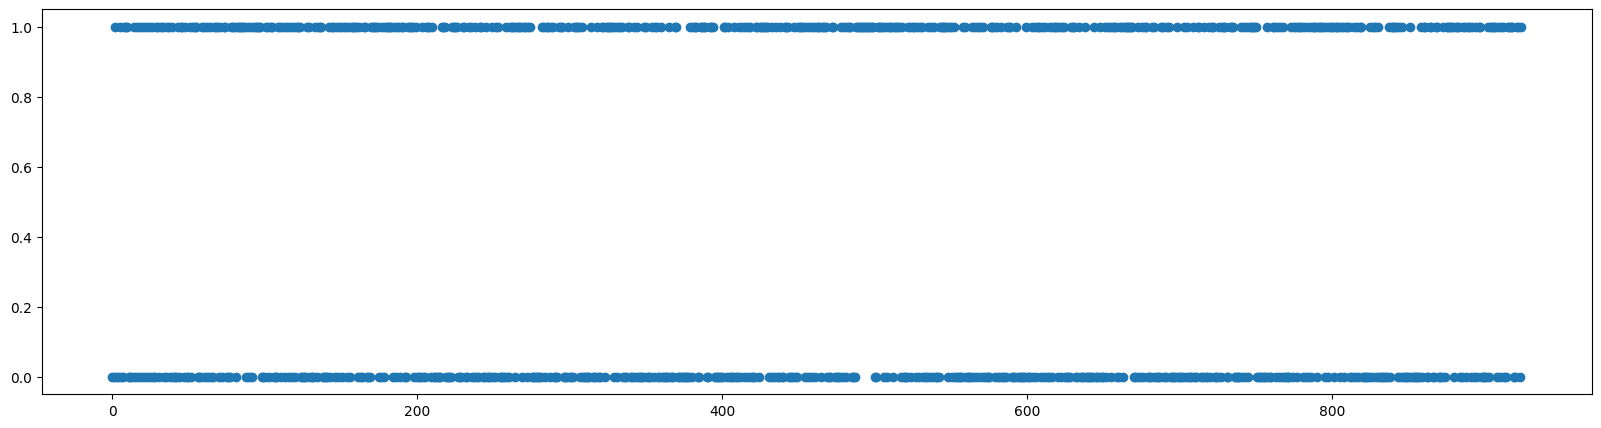

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(1,1,1)
plt.scatter(np.arange(0,len(target)),target)

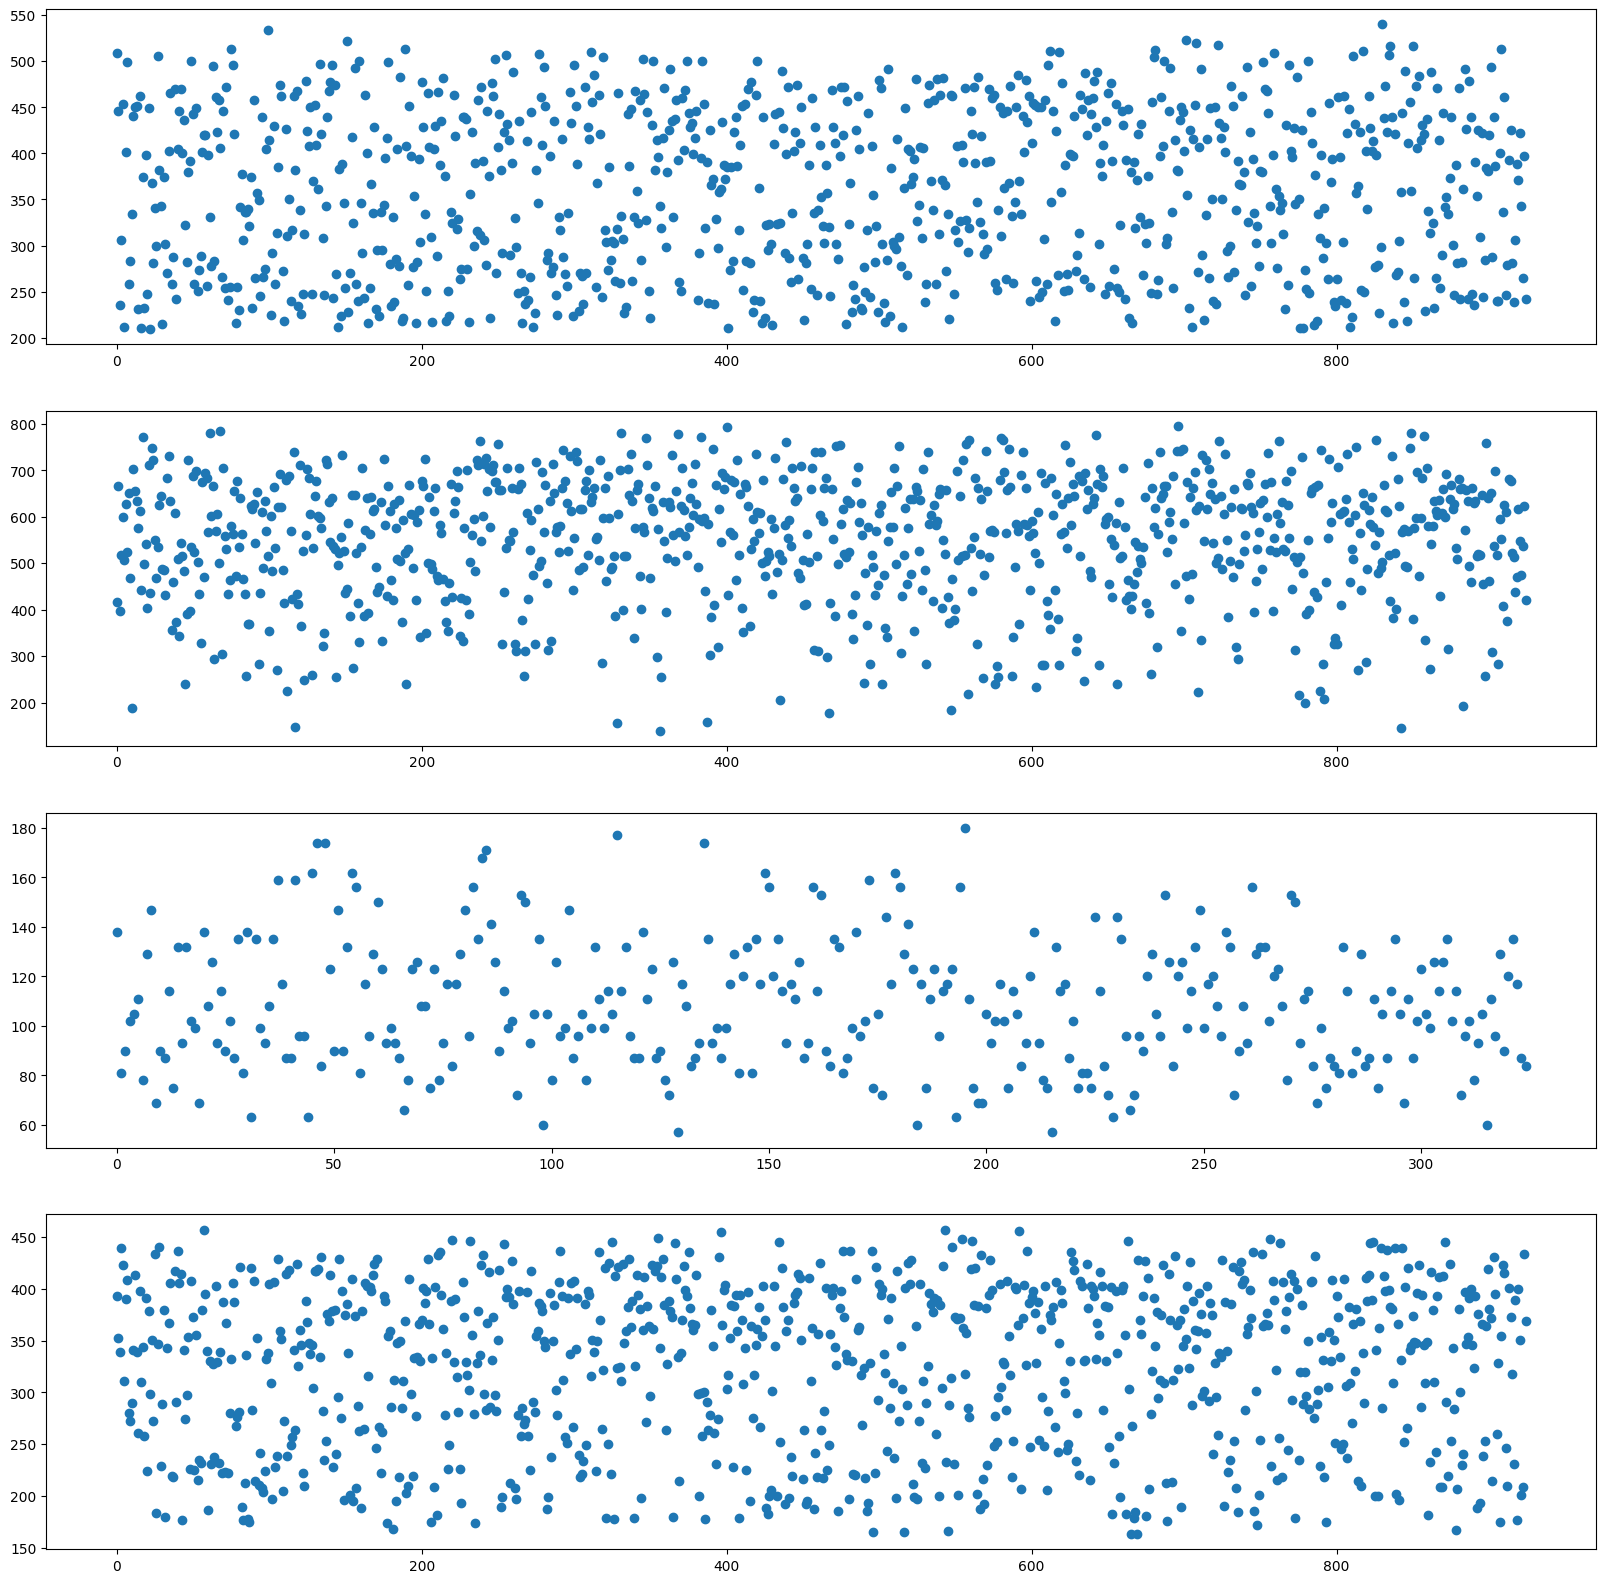

In [8]:
plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.scatter(np.arange(0,len(feats[i])),feats[i])

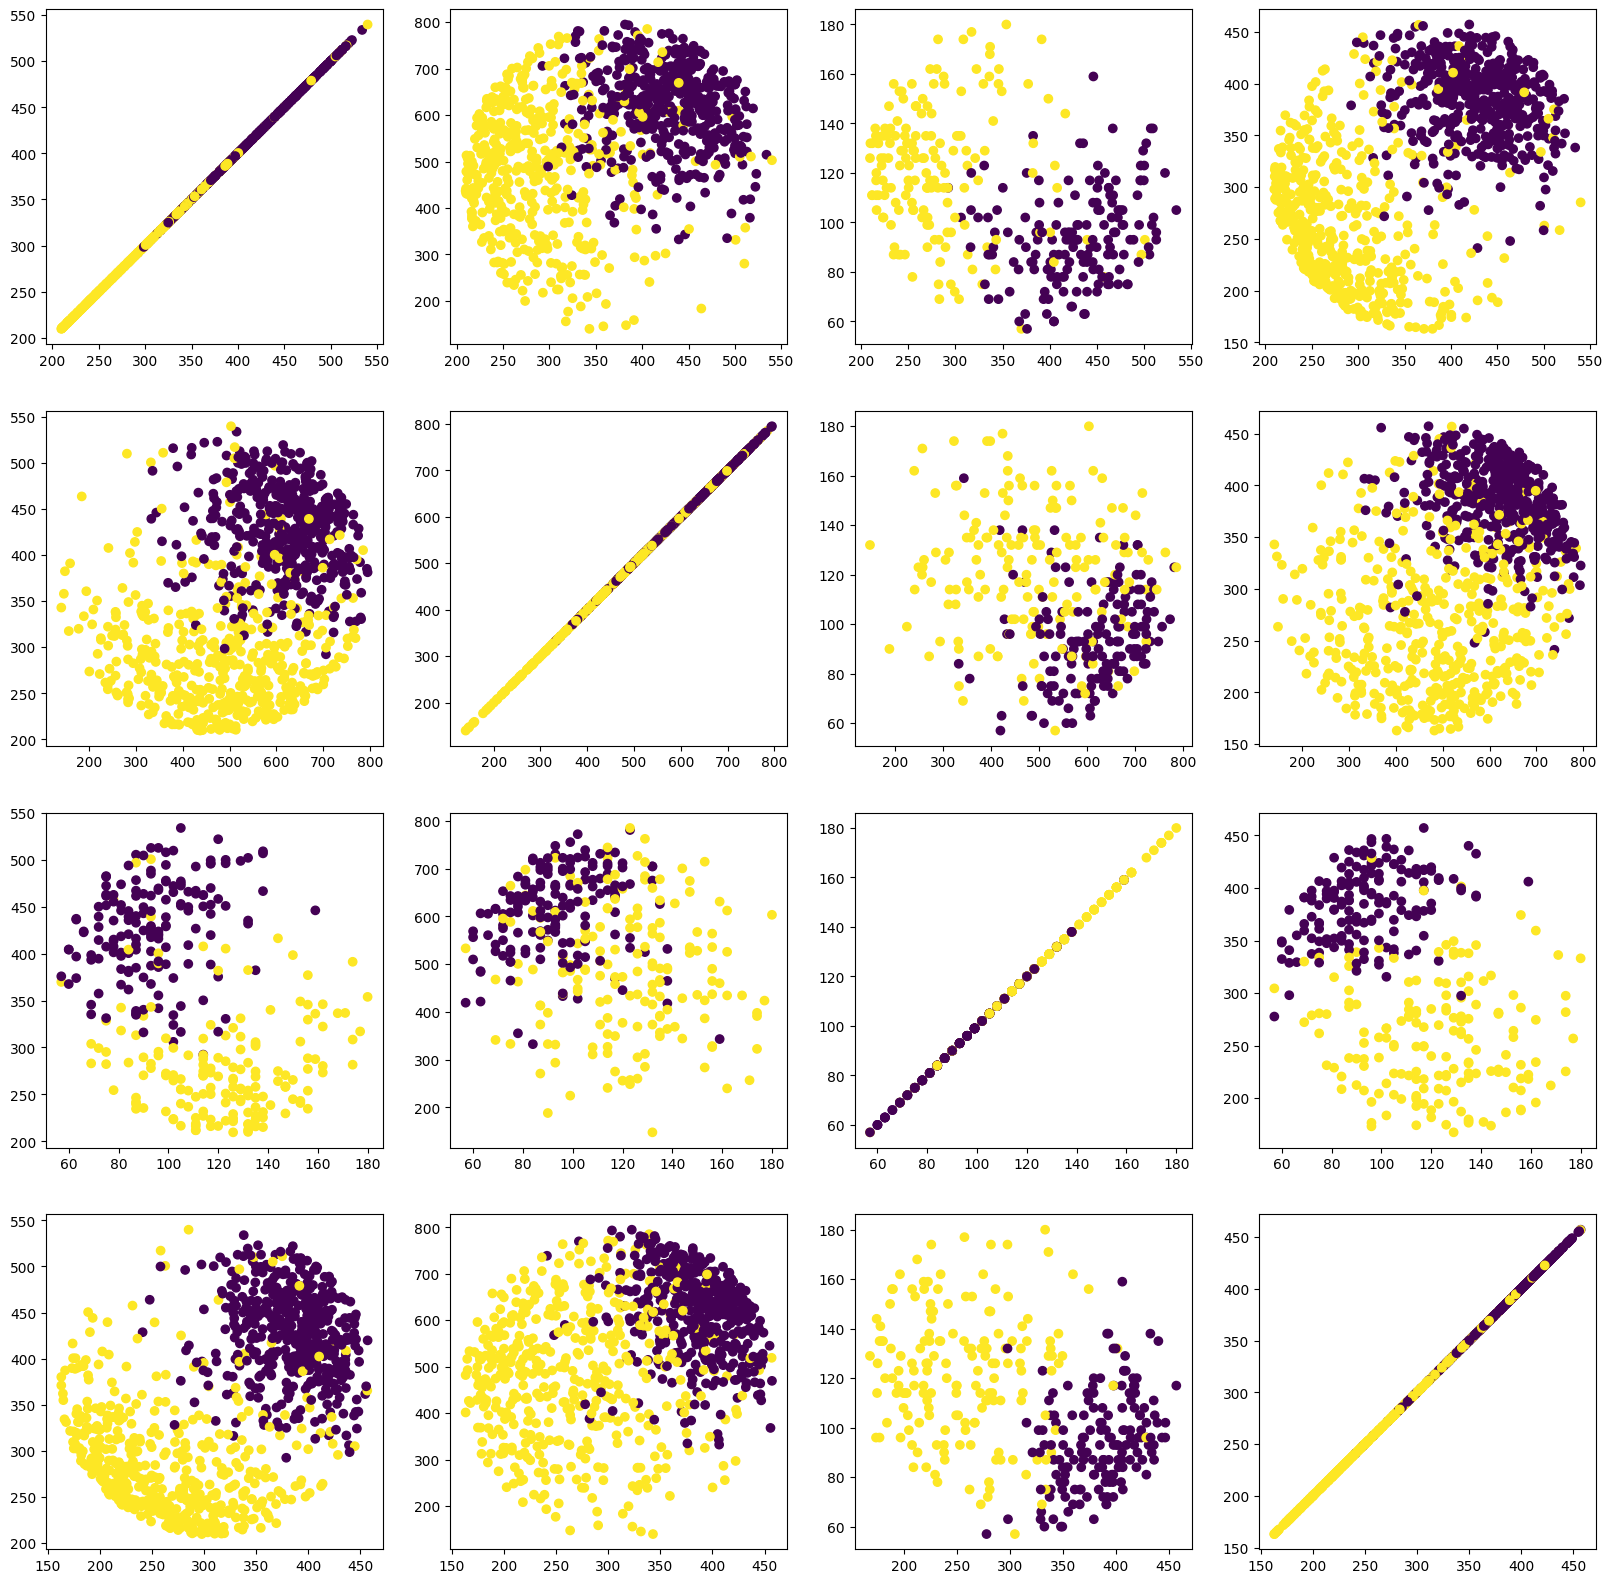

In [9]:

plt.figure(figsize=(20,20))
cnt = 0
for i in range(4):
    for j in range (4):
        cnt+=1
        plt.subplot(4,4,cnt)
        plt.scatter(feats[i], feats[j], c=target)

plt.show()

<h1>Preprocessing</h1>

<h2>Encoding categorical values</h2>

In [10]:
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

In [11]:
encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['var3', 'var6']
encoder.fit(df[f_names])
df = ohe_new_features(df, f_names, encoder)
df

/home/iviosab/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,target,var1,var2,var4,var5,var3_Albania,var3_Algeria,var3_American Samoa,var3_Andorra,var3_Angola,...,var3_Uzbekistan,var3_Vanuatu,var3_Venezuela,var3_Vietnam,var3_Wallis and Futuna,var3_Western Sahara,var3_Yemen,var3_Zambia,var3_Zimbabwe,var6_yes
0,0,509.18,417.681,138.0,393.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,446.06,666.182,81.0,352.05,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,235.50,398.097,90.0,339.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,306.02,518.163,102.0,439.25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,453.08,600.156,105.0,422.95,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,0,422.34,547.259,NaN,350.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
921,1,342.62,473.919,NaN,200.85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
922,1,265.10,538.170,NaN,208.35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
923,0,397.12,622.386,NaN,433.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<h2>Data imputation</h2>

Linear Regression

In [12]:
var4_df = df[~df['var4'].isnull()]
X = var4_df.drop('var4', axis=1)
y = var4_df.var4.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 31385778518.30397
Mean Squared Error: 1.1355717668805181e+22
Root Mean Squared Error: 106563209733.96579


Polynomial Regression

In [15]:
degrees = [2]

for i in range(len(degrees)):
    degree = degrees[i]
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()

    # write 2 lines of code to create a pipeline that contains
    #   polynomial_features and linear_regression;
    #   also fit the created pipeline on the X dataset
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train,y_train)

    y_pred_poly = pipeline.predict(X_test)

    # write one line bewlow to calculate the MSE
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))


Mean Absolute Error: 72.08172098512692
Mean Squared Error: 9118.047107985165
Root Mean Squared Error: 95.48846583742544


Get data with no NaN</br>
Split</br>
Scale fit transform train</br>
Scale transform test</br>
Get missing</br> 
